In [12]:
# Import relevant modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
import pybird
from importlib import reload
reload(pybird)

<module 'pybird' from '/Users/pierre/Documents/github/pybird/pybird_dev/pybird.py'>

In [13]:
font = {'size': 16, 'family': 'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [89]:
kk = np.linspace(0.005, 0.25, 50)
Om_AP = 0.310

In [90]:
zpk = 0.6

M = Class()
M.set({'output': 'mPk', 'P_k_max_1/Mpc': 1.0, 'z_max_pk': zpk})
M.set({'ln10^{10}A_s': 3.044, 'n_s': 0.9649, 'h': 0.6736, 'omega_b': 0.02237, 'omega_cdm': 0.120})
M.compute()
k11 = np.logspace(-5, 0, 200) # k in h/Mpc
P11 = np.array([M.pk(ki*M.h(), zpk)*M.h()**3 for ki in k11]) # P(k) in (Mpc/h)**3
f = M.scale_independent_growth_factor_f(zpk)

In [105]:
C = pybird.Correlator()
C.set({'output': 'mPk', 'multipole': 2, 'xdata': kk, 'kmax': kdata[-1], 'z': zpk, 
       'optiresum': True, 'with_bias': True})
C.compute({'k11': k11, 'P11': P11, 'f': f, 
        'bias': {'cct': -2., 'cr1': -2.} })
mPk = C.get()

In [106]:
C.set({'output': 'bPk', 'multipole': 2, 'xdata': kk, 'kmax': kdata[-1], 'z': zpk, 
       'optiresum': True, 'with_bias': True})
C.compute({'k11': k11, 'P11': P11, 'f': f, 
        'bias': {'b1': 2., 'b2': 1., 'b3': .5, 'b4': 1., 'cct': 1., 'cr1': -4.} })
bPk = C.get()

In [107]:
reload(pybird)

C.set({'output': 'bmPk', 'multipole': 2, 'xdata': kk, 'kmax': kdata[-1], 'z': zpk, 
       'optiresum': True, 'with_bias': True})
C.compute({'k11': k11, 'P11': P11, 'f': f, 
        'bias': {'b1': 2., 'b2': 1., 'b3': .5, 'b4': 1., 'cct': 1., 'cr1': -4., 'dct': -2., 'dr1': -2.} })
bmPk = C.get()

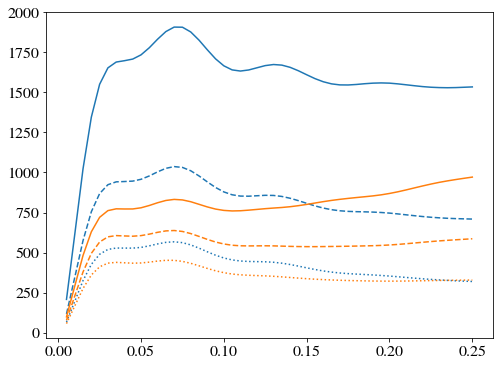

In [108]:
for i in range(2):
    plt.plot(kk, kk*mPk[i], 'C%s:'%i)
    plt.plot(kk, kk*bPk[i], 'C%s-'%i)
    plt.plot(kk, kk*bmPk[i], 'C%s--'%i)

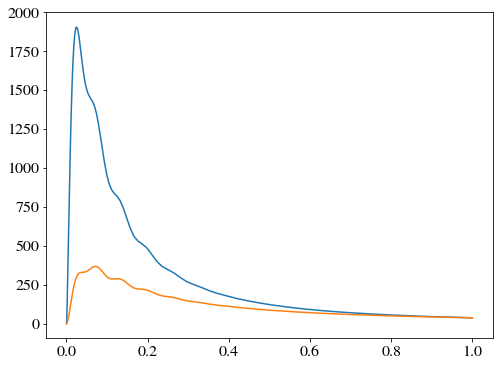

In [117]:
plt.plot(k11, k11**0.5 * P11)
plt.plot(k11, k11 * P11)